# Pymaceuticals Inc.
---

### Analysis

The drug Capomulin appears to have kept the SCC tumors smallest compared to the other drugs of interest (Ramicane, Infubinol, and Ceftamin), as seen in the Box Plot Figure. A statistical analysis shows a strong positive correlation (0.84) between mouse weight and tumor volume, suggesting that heavier mice will have larger tumors. The mice tested were fairly equal in terms of sex (49% female and 51% male) suggesting that the efficacy of Capomulin is likely not impacted by sex.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df=pd.merge(mouse_metadata,study_results, on='Mouse ID', how='inner')

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
mouse_count=mouse_data_df['Mouse ID'].nunique()
mouse_count

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
# duplicate_mice = duplicate_mice.sort_values(by=['Mouse ID', 'Timepoint'])
duplicate_mice

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=mouse_data_df.loc[mouse_data_df["Mouse ID"] == 'g989', :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=mouse_data_df[mouse_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_count=clean_data["Mouse ID"].value_counts()
len(clean_count)



248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# each_regimen=mouse_data_df.groupby(['Drug Regimen'])

mean=clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median=clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance=clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_dev=clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
SEM=clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


summary_stats=pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Variance": variance,
                            "Standard Deviation": std_dev,
                            "Tumor SEM": SEM})
summary_stats.head()

/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_64902/2977196922.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean=clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_64902/2977196922.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median=clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_64902/2977196922.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will defau

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_adv =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_adv

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

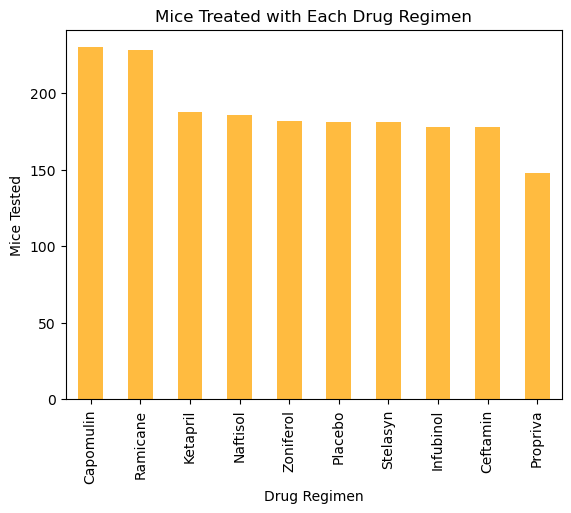

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows=clean_data["Drug Regimen"].value_counts()
pandas_chart=rows.plot(kind="bar", color="orange", alpha=0.75, title="Mice Treated with Each Drug Regimen", xlabel="Drug Regimen", ylabel="Mice Tested")



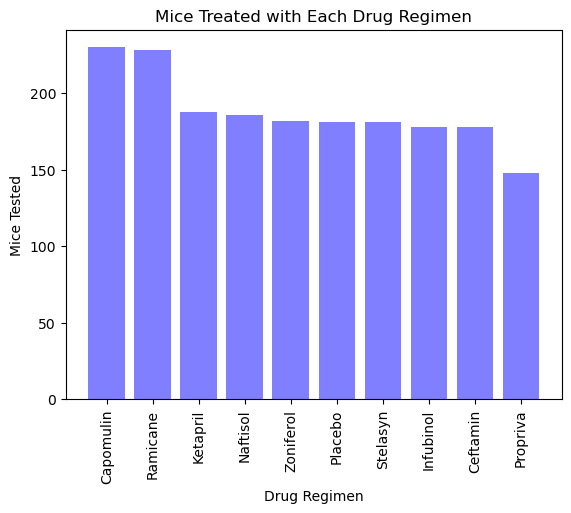

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=rows.index.values
y_axis=rows.values
plt.bar(x_axis, y_axis, color="b", alpha=.50, align="center")
plt.title("Mice Treated with Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xticks(rotation="vertical")
plt.show()


<Axes: title={'center': 'Gender of Mice'}>

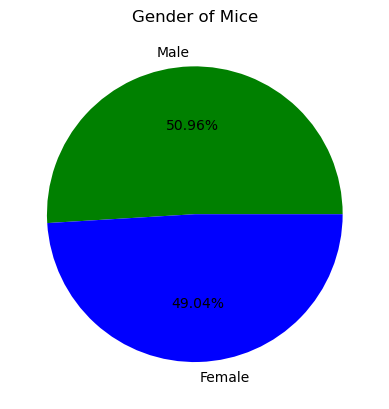

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender=clean_data["Sex"].value_counts()
mouse_gender.plot(kind="pie", title= "Gender of Mice", ylabel="", labels=["Male", "Female"], colors=["g", "b"], autopct="%1.2f%%")

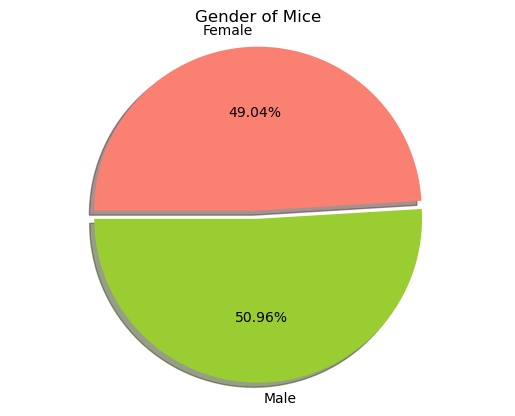

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender=clean_data["Sex"].value_counts()
gender= ["Male", "Female"]
colors=["yellowgreen", "salmon"]
explode=(0, 0.05)
plt.title("Gender of Mice")
plt.pie(mouse_gender, explode=explode, labels=gender, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
# print(greatest_timepoint_df.head())

treatments_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments=clean_data[clean_data['Drug Regimen'].isin(treatments_list)]
# print(treatments.head())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_treatment_df=pd.merge(greatest_timepoint_df.reset_index(), clean_data, on=['Mouse ID', 'Timepoint'])
print(merged_treatment_df.head())




  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # add subset 
    subset = merged_treatment_df[merged_treatment_df['Drug Regimen']==drug]
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    tumor_vol = subset['Tumor Volume (mm3)']
    # Append the tumor volume data to the tumor_vol_data list
    tumor_vol_data.append(tumor_vol)
    # Calculate the quartiles and IQR for the tumor volume data
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine if there are any potential outliers in the tumor volume data
    outliers = tumor_vol.loc[(tumor_vol <= lower_bound) | (tumor_vol >= upper_bound)]
    print(f"{drug} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


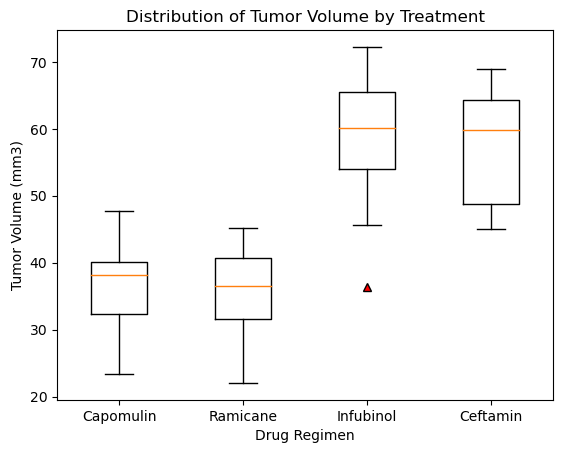

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker':'^', 'markerfacecolor': 'red'})
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Distribution of Tumor Volume by Treatment")
plt.show()

## Line and Scatter Plots

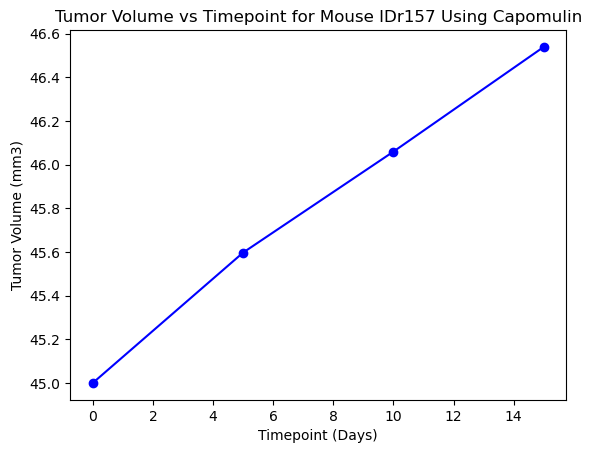

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
# print(capomulin_df)

# select a single mouse
mouse_id = "r157"
single_mouse=capomulin_df.loc[capomulin_df["Mouse ID"]==mouse_id]

# create line plot
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker="o", color="b")
plt.title(f"Tumor Volume vs Timepoint for Mouse ID{mouse_id} Using Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_64902/291303934.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weight_group = capomulin_df.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]


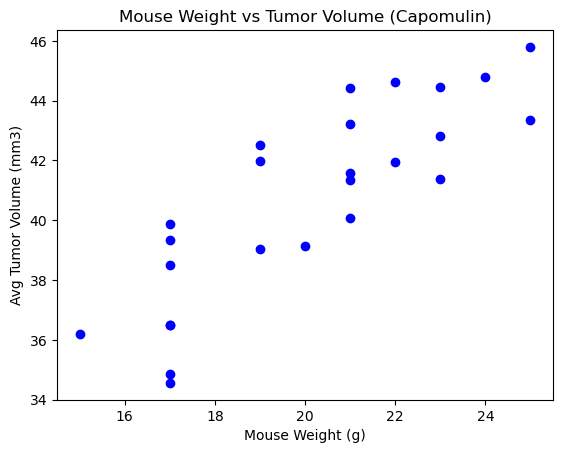

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
by_weight_group = capomulin_df.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]
plt.scatter(by_weight_group["Weight (g)"], by_weight_group["Tumor Volume (mm3)"], marker='o', color='b')
plt.title("Mouse Weight vs Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Pearson's correlation value for mouse weight and average tumor volume is 0.84


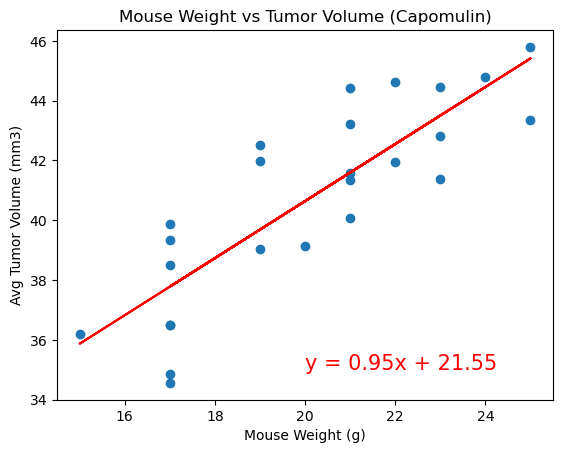

In [95]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation coefficient
weight=by_weight_group['Weight (g)']
avg_tumor_vol=by_weight_group['Tumor Volume (mm3)']
correlation=st.pearsonr(weight,avg_tumor_vol)
print(f"Pearson's correlation value for mouse weight and average tumor volume is {round(correlation[0],2)}")

# linear regression model
from scipy.stats import linregress
x_values=by_weight_group['Weight (g)']
y_values=by_weight_group['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot the model
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35), fontsize=15,color="red")
plt.title('Mouse Weight vs Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()